In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime

## 1. 파일호출

In [2]:
# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_body.pkl', 'rb') as f:
    df_body = pickle.load(f)


In [4]:
# 파일 불러오기
with open('../../data/df_user.pkl', 'rb') as f:
    df_user = pickle.load(f)



In [5]:
# 파일 불러오기
with open('../../data/df_answer_cnt.pkl', 'rb') as f:
    df_answer_cnt = pickle.load(f)

In [6]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [7]:
df_body['date'] = df_body['creationdate'].dt.date
df_body['year'] = df_body['creationdate'].dt.year
df_body['month'] = df_body['creationdate'].dt.month
df_body['day'] = df_body['creationdate'].dt.day

In [8]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

## 2. POST

### Number of Questions and Answers over time

In [ ]:
# Q&A 만 추출 
df_body = df_body[df_body['posttypeid'].isin(['1','2'])]

In [ ]:
df_qna_num = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [ ]:
df_qna_num[df_qna_num['posttypeid'] =='1'].date

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(df_qna_num[df_qna_num['posttypeid'] =='1'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='1'].id
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_qna_num[df_qna_num['posttypeid'] =='2'].date
        ,  df_qna_num[df_qna_num['posttypeid'] =='2'].id
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
df_body.groupby(['posttypeid']).count()[['id']]

In [ ]:
df_body['body_len'] = df_body['body'].apply(lambda x : len(x))

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_bodycnt = df_body.groupby(['date', 'posttypeid']).count()[['id']].reset_index()

In [ ]:
df_bodycnt = pd.pivot_table(df_bodycnt, index = 'date', columns = 'posttypeid', values = 'id').reset_index()

In [ ]:
df_bodycnt['q_over_a'] = df_bodycnt['2'].div(df_bodycnt['1'])

### Question over Answer

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodycnt.date
    ,  height = df_bodycnt['q_over_a']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question over Answer", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A/Q", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();



In [ ]:
df_bodyanswerdyn = df_body[df_body['posttypeid'] =='1'].groupby(['date', 'answered_yn']).count()[['id']].reset_index()

In [ ]:
df_bodyanswerdyn = pd.pivot_table(df_bodyanswerdyn, index = 'date', columns = 'answered_yn', values = 'id').reset_index()

In [ ]:
df_bodyanswerdyn['rate'] = df_bodyanswerdyn[1] / (df_bodyanswerdyn[1] + df_bodyanswerdyn[0])

### Ratio of Answered Question

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_bodyanswerdyn.date
    ,  height = df_bodyanswerdyn['rate']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Ratio of Answered Question", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Ratio", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Answer Count line plot

In [9]:
df_answer_cnt

,year,id,cnt
0,2019,58652589,1
1,2019,58652591,0
2,2019,58652594,1
3,2019,58652601,1
4,2019,58652602,0
...,...,...,...
594474,2023,77582335,0
594475,2023,77582336,1
594476,2023,77582339,1
594477,2023,77582341,2


In [10]:
df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count']

cnt
0     30669
1     77741
2     20824
3      4912
4      1181
5       310
6        80
7        24
8         8
9         7
10        1
11        1
12        3
13        1
14        1
Name: count, dtype: int64

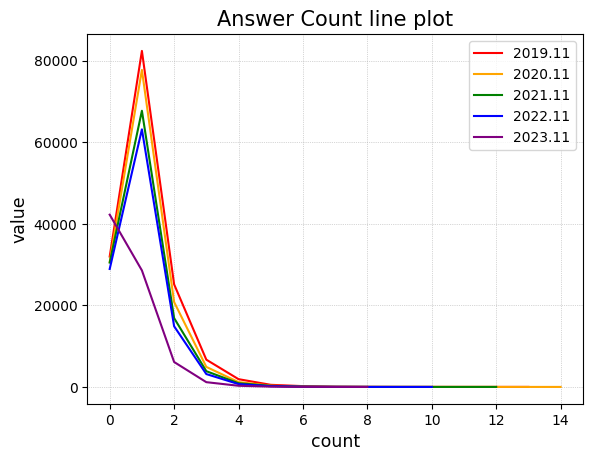

In [11]:
fig, ax = plt.subplots()


ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2019'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'red',
        label = '2019.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2020'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'orange',
        label = '2020.11'
) 

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2021'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'green',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2022'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'blue',
         label = '2022.11'
        # label = ['question', 'answer']
        ) # create legened labels

ax.plot(df_answer_cnt.loc[(df_answer_cnt['year']== '2023'), 'cnt'].value_counts().sort_index().to_frame()['count'].values, # specify data
        color = 'purple', # bar color
        label = '2023.11'
        ) # create legened labels





ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

### Minimun timedelta to get response per Date
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [12]:
df_da['qna_diff'] = df_da['a_creationdate'] - df_da['q_creationdate']

In [13]:
df_da_df = df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [14]:
df_da_df['qna_diff_int'] = df_da_df['qna_diff']/ pd.Timedelta(minutes=1)

In [15]:
df_da_df[['qna_diff', 'qna_diff_int', 'date']]

,qna_diff,qna_diff_int,date
4773871,0 days 00:27:55.227000,27.920450,2013-11-01
14555946,0 days 00:01:21.357000,1.355950,2013-11-01
21165579,0 days 00:08:15.753000,8.262550,2013-11-01
14555949,0 days 00:05:28.213000,5.470217,2013-11-01
2123150,0 days 01:10:06.263000,70.104383,2013-11-01
...,...,...,...
22889919,0 days 00:12:22.637000,12.377283,2023-11-30
20771525,0 days 00:15:07.043000,15.117383,2023-11-30
14092975,0 days 00:03:40.630000,3.677167,2023-11-30
941025,0 days 04:54:11.874000,294.197900,2023-11-30


In [16]:
df_da_df_dff        = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_df_dff_min    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_df_dff_max    = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_df_dff_median = df_da_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


In [17]:
df_da_df_dff.head()

,date,year,month,day,qna_diff_int
0,2013-11-01,2013,11,1,30290.791568
1,2013-11-02,2013,11,2,28129.797441
2,2013-11-03,2013,11,3,37157.496537
3,2013-11-04,2013,11,4,33486.547305
4,2013-11-05,2013,11,5,31900.980285


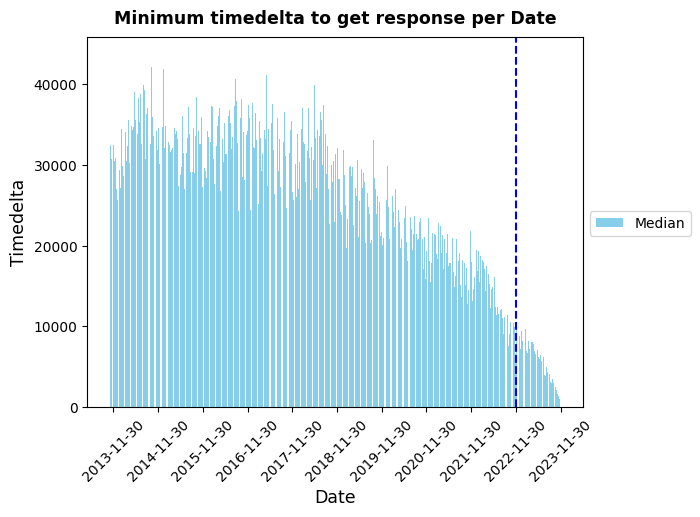

In [29]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff.date
    ,  height = df_da_df_dff['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

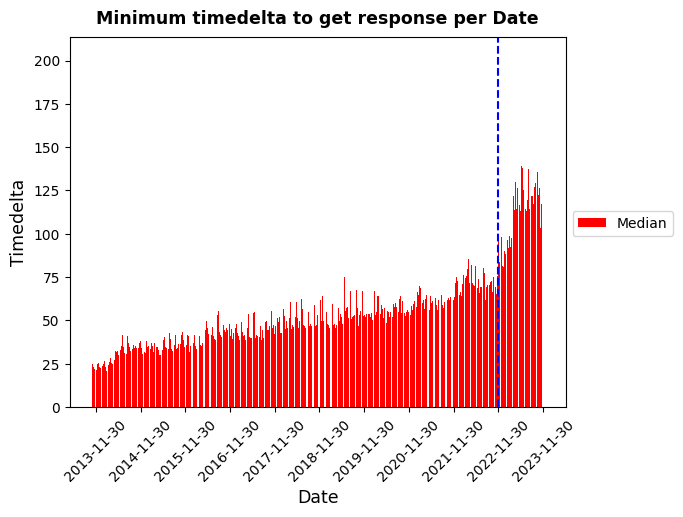

In [18]:
fig, ax = plt.subplots()

ax.bar(df_da_df_dff_median.date
    ,  height = df_da_df_dff_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Minimun timedelta to get response per Day in 1 month 
* 질문과 첫번째 답 사이 gap 에 대한 time distribution

In [19]:
df_da_in_month = df_da[df_da['qna_diff'].dt.days <=30]

In [20]:
df_da_in_month_df = df_da_in_month.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1)

In [21]:
df_da_in_month_df['qna_diff_int'] = df_da_in_month_df['qna_diff']/ pd.Timedelta(minutes=1)

In [23]:
df_da_in_month_df        = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).mean().reset_index()
df_da_in_month_df_min    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).min().reset_index()
df_da_in_month_df_max    = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).max().reset_index()
df_da_in_month_df_median = df_da_in_month_df[['date','year', 'month', 'day','qna_diff_int']].groupby(['date','year', 'month', 'day']).median().reset_index()


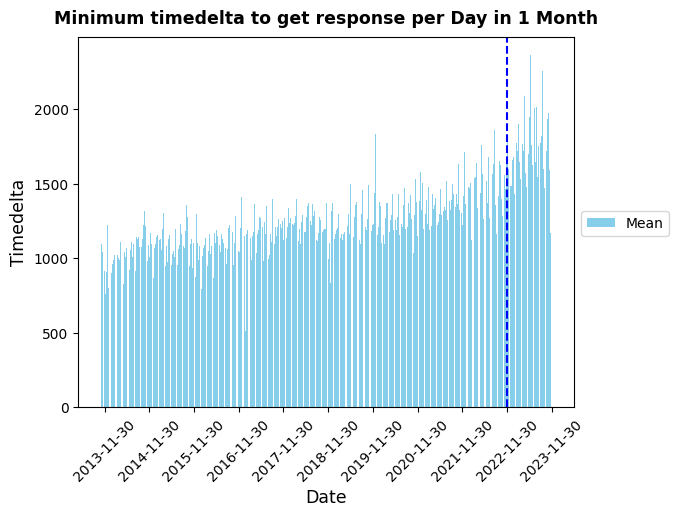

In [30]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df.date
    ,  height = df_da_in_month_df['qna_diff_int']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

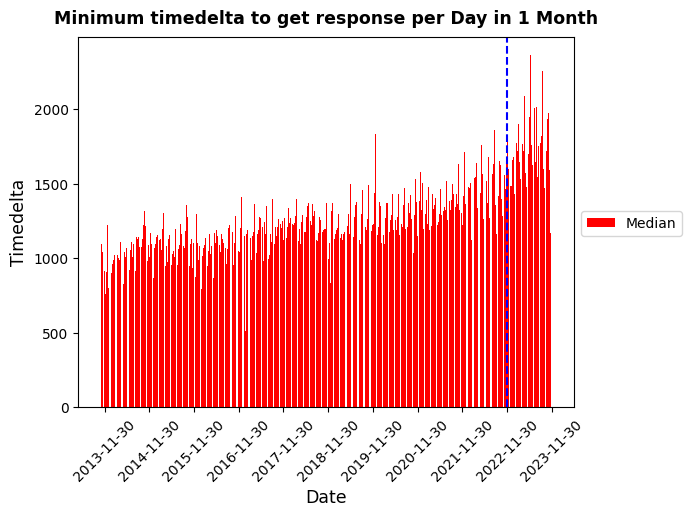

In [31]:
fig, ax = plt.subplots()

ax.bar(df_da_in_month_df_median.date
    ,  height = df_da_in_month_df_median['qna_diff_int']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Minimum timedelta to get response per Day in 1 Month", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Timedelta", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

### Distribution of Timedelta

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.hist(df_da_df_dff['qna_diff_int'], # specify data
        bins = 20, # number of bins

        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Distribution of Timedelta", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Timedelta", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# ax.axvline(['2022-11-30'], # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)



# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.show();

### Length of Questions per Date

In [ ]:
df_body.groupby(['year', 'month', 'day', 'posttypeid']).mean(['body_len'])

In [ ]:
df_date_per_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()
df_date_per_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['body_len']).reset_index()
df_date_per_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len']).reset_index()
df_date_per_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['body_len']).reset_index()

In [ ]:
df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['body_len'])

In [ ]:
df_date_per_len_q = df_date_per_len[df_date_per_len['posttypeid'] =='1']
df_date_per_len_q = df_date_per_len_q.set_index('date')
df_date_per_len_a = df_date_per_len[df_date_per_len['posttypeid'] =='2']
df_date_per_len_a = df_date_per_len_a.set_index('date')

In [ ]:
df_date_per_len_min_q = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='1']
df_date_per_len_min_q = df_date_per_len_min_q.set_index('date')
df_date_per_len_min_a = df_date_per_len_min[df_date_per_len_min['posttypeid'] =='2']
df_date_per_len_min_a = df_date_per_len_min_a.set_index('date')

In [ ]:
df_date_per_len_max_q = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='1']
df_date_per_len_max_q = df_date_per_len_max_q.set_index('date')
df_date_per_len_max_a = df_date_per_len_max[df_date_per_len_max['posttypeid'] =='2']
df_date_per_len_max_a = df_date_per_len_max_a.set_index('date')

In [ ]:
df_date_per_len_median_q = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='1']
df_date_per_len_median_q = df_date_per_len_median_q.set_index('date')
df_date_per_len_median_a = df_date_per_len_median[df_date_per_len_median['posttypeid'] =='2']
df_date_per_len_median_a = df_date_per_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()


# ax.bar(df_date_per_len_max_q.index
#     ,  height = df_date_per_len_max_q['body_len']
#     ,  color = 'green'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.bar(df_date_per_len_q.index
    ,  height = df_date_per_len_q['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_q.index
    ,  height = df_date_per_len_median_q['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type


# ax.bar(df_date_per_len_min_q.index
#     ,  height = df_date_per_len_min_q['body_len']
#     ,  color = 'red'
#     # ,  edgecolor = 'black'
#       ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)



ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.show();

In [ ]:
df_date_per_len_diff = (df_date_per_len_max_q['body_len'] - df_date_per_len_min_q['body_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()


ax.bar(df_date_per_len_diff.index
    ,  height = df_date_per_len_diff['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

### Length of Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_a.index
    ,  height = df_date_per_len_a['body_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_len_median_a.index
    ,  height = df_date_per_len_median_a['body_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

### Answer Length over Question Length per Date

In [ ]:
df_date_per_len_rate = df_date_per_len_a['body_len'].div( df_date_per_len_q['body_len']).to_frame()

In [ ]:
df_date_per_len_rate.head()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_len_rate.index
    ,  height = df_date_per_len_rate['body_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Answer Length over Question Length per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("A Len/Q Len", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();







### Length of SRC in Questions per Date

In [ ]:
def cleanhtml(raw_html):
  # 1.Source code in python language is hard to understand, so replace all the <code> tag first
  cleantext_1 = re.findall(r'(?<=\<code>)(.*?)(?=<\/code>)', raw_html.replace('\n', '_**_'))
  cleantext_1 = [x.replace('_**_', '\n') for x in cleantext_1]
  # 2. replace html tags
  # <p>
  tag_re = re.compile('<.*?>')
  cleantext_2 = [re.sub(tag_re, '', x) for x in cleantext_1]
  return cleantext_2

In [ ]:
# # apply the function, cleanhtml to the question and body text
# df_body.loc[:, 'prep_body'] = df_body['body'].apply(cleanhtml)
# 15분 걸림
# 전체 데이터셋 
# with open('../../data/df_body_prep.pkl', 'wb') as f:
#     pickle.dump(df_body, f)
# 파일 불러오기
with open('../../data/df_body_prep.pkl', 'rb') as f:
    df_body = pickle.load(f)

In [ ]:
df_body['concat_prep_body'] = df_body['prep_body'].apply(lambda x : ''.join(x))

In [ ]:
df_body['src_len'] = df_body['concat_prep_body'].apply(lambda x:len(x))

In [ ]:
len(df_body['id'].unique())
# 43352042

In [ ]:
df_date_per_src_len = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['src_len']).reset_index()
df_date_per_src_len_min = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).min(['src_len']).reset_index()
df_date_per_src_len_max = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).max(['src_len']).reset_index()
df_date_per_src_len_median = df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).median(['src_len']).reset_index()

In [ ]:
df_date_per_src_len_q = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='1']
df_date_per_src_len_q = df_date_per_src_len_q.set_index('date')
df_date_per_src_len_a = df_date_per_src_len[df_date_per_src_len['posttypeid'] =='2']
df_date_per_src_len_a = df_date_per_src_len_a.set_index('date')

In [ ]:
df_date_per_src_len_median_q = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='1']
df_date_per_src_len_median_q = df_date_per_src_len_median_q.set_index('date')
df_date_per_src_len_median_a = df_date_per_src_len_median[df_date_per_src_len_median['posttypeid'] =='2']
df_date_per_src_len_median_a = df_date_per_src_len_median_a.set_index('date')

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_q.index
    ,  height = df_date_per_src_len_q['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_src_len_median_q.index
    ,  height = df_date_per_src_len_median_q['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length of SRC in Questions per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))


plt.xticks(rotation=45)
plt.show();

### Length  of SRC in Answers per Date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_a.index
    ,  height = df_date_per_src_len_a['src_len']
    ,  color = 'skyblue'
    ,  label = 'Mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.bar(df_date_per_src_len_median_a.index
    ,  height = df_date_per_src_len_median_a['src_len']
    ,  color = 'red'
    ,  label = 'Median'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Length  of SRC in Answers per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Length", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_date_per_src_len_rate = df_date_per_src_len_a['src_len'].div( df_date_per_src_len_q['src_len']).to_frame()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_src_len_rate.index
    ,  height = df_date_per_src_len_rate['src_len']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [ ]:
df_q_a = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==1)]
df_q = df_body[(df_body['posttypeid']=='1')&(df_body['answered_yn']==0)]
# df_body.groupby(['date','year', 'month', 'day', 'posttypeid']).mean(['body_len']).reset_index()

In [ ]:
# df_date_per_src_len = 
df_q_a_m = df_q_a.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_a_m_median = df_q_a.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

df_q_m = df_q.groupby(['date','year', 'month', 'day']).mean(['src_per_body']).reset_index()
df_q_m_median = df_q.groupby(['date','year', 'month', 'day']).median(['src_per_body']).reset_index()

In [ ]:
df_q_m

In [ ]:
# df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])

### SRC length of Answered Questions

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
yticks = np.arange(200, 2000, 400)
axs[0].bar(df_q_a_m['date']
        ,  df_q_a_m['src_len']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type


axs[0].bar(df_q_a_m_median['date']
        ,  df_q_a_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('SRC length of Answered Questions ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Length', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].set_yticks(yticks)
axs[0].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].bar(df_q_m['date']
        ,  df_q_m['src_len']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].bar(df_q_m_median['date']
        ,  df_q_m_median['src_len']
        ,  color = 'red'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('SRC length of not Answered Questions ', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Length', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].set_yticks(yticks)
axs[1].axvline([major_xticks[-2]], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();

In [ ]:
# fig, ax = plt.subplots()

# ax.bar(df_date_per_src_len_rate.index
#     ,  height = df_q_a_m['src_per_body'].div(df_q_m['src_per_body'])
#     ,  color = 'skyblue'
#     # ,  edgecolor = 'black'
#       ) # hist type

# ax.set_title("Question and Answer Count per Date", # add title
#              fontsize = 12.5,
#              weight = 'bold',
#              pad = 10,
#              loc = 'center')
# ax.set_xlabel("Date", # add x-axis label
#               fontsize = 12.5)
# ax.set_ylabel("Count", # add y-axis label
#               fontsize = 12.5)

# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# ax.set_xticks(major_xticks)

# # ax.axvline('2022-11-30', # add vertical line
# #            color = 'red',
# #            linestyle = '--',
# #            linewidth = 1.5)


# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

# plt.xticks(rotation=45)
# plt.show();

### Length of Title per Day

In [ ]:
df_body_q = df_body[df_body['posttypeid'] =='1']

In [ ]:
df_body_q['title_len'] = df_body_q['title'].apply(lambda x : len(x))

In [ ]:
df_date_per_t_len         = df_body_q.groupby(['date','year', 'month', 'day']).mean(['title_len']).reset_index()
df_date_per_len_t_min     = df_body_q.groupby(['date','year', 'month', 'day']).min(['title_len']).reset_index()
df_date_per_len_t_max     = df_body_q.groupby(['date','year', 'month', 'day']).max(['title_len']).reset_index()
df_date_per_len_t_median  = df_body_q.groupby(['date','year', 'month', 'day']).median(['title_len']).reset_index()

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_date_per_t_len.date
    ,  height = df_date_per_t_len['title_len']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_date_per_len_t_median.date
    ,  height = df_date_per_len_t_median['title_len']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.set_title("Length of Title per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

## 3. Tag

### Number of Tag per Day

In [32]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [33]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [34]:
df_da_q['q_tags_list'] = df_da_q['q_tags'].apply(lambda x : x.strip().split(' '))

In [35]:
print(df_da_q[['q_id']].shape)
print(df_da_q[['q_id']].drop_duplicates().shape)

(14875408, 1)
(14875408, 1)


In [36]:
df_da_q = df_da_q.reset_index(drop=True)

In [37]:
df_da_q_ex = df_da_q[['q_id', 'q_tags_list']].apply(pd.Series.explode)

In [38]:
df_da_q_ex['q_tags_list'].value_counts().head(20)

q_tags_list
javascript    1690363
python        1586623
java          1154509
c#             879425
php            829929
android        809265
html           783760
jquery         557185
css            534381
c++            466645
sql            449856
ios            404899
mysql          391689
r              375403
reactjs        366063
node.js        340276
arrays         310251
python-3.x     269758
swift          267676
json           254917
Name: count, dtype: int64

In [44]:
df_da_q_ex

,q_id,q_tags_list
0,74640391,javascript
0,74640391,arrays
1,74323741,ruby
1,74323741,jekyll
1,74323741,jekyll-extensions
...,...,...
14875407,74641964,python
14875407,74641964,time
14875407,74641964,geopandas
14875407,74641964,folium


In [39]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [49]:
df_da_q_year = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')

In [57]:
df_da_q_year = df_da_q_year.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
#  df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1) > 확인필요 

In [61]:
df_da_q_year = df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)

In [65]:
df_da_q_year

,year,q_tags_list,q_id
392871,2023,python,82379
384066,2023,javascript,51909
394235,2023,reactjs,29215
373088,2023,c#,27188
383956,2023,java,26864
...,...,...,...
9724,2013,jquery,21686
8313,2013,html,18990
15064,2013,python,16494
2449,2013,c++,13705


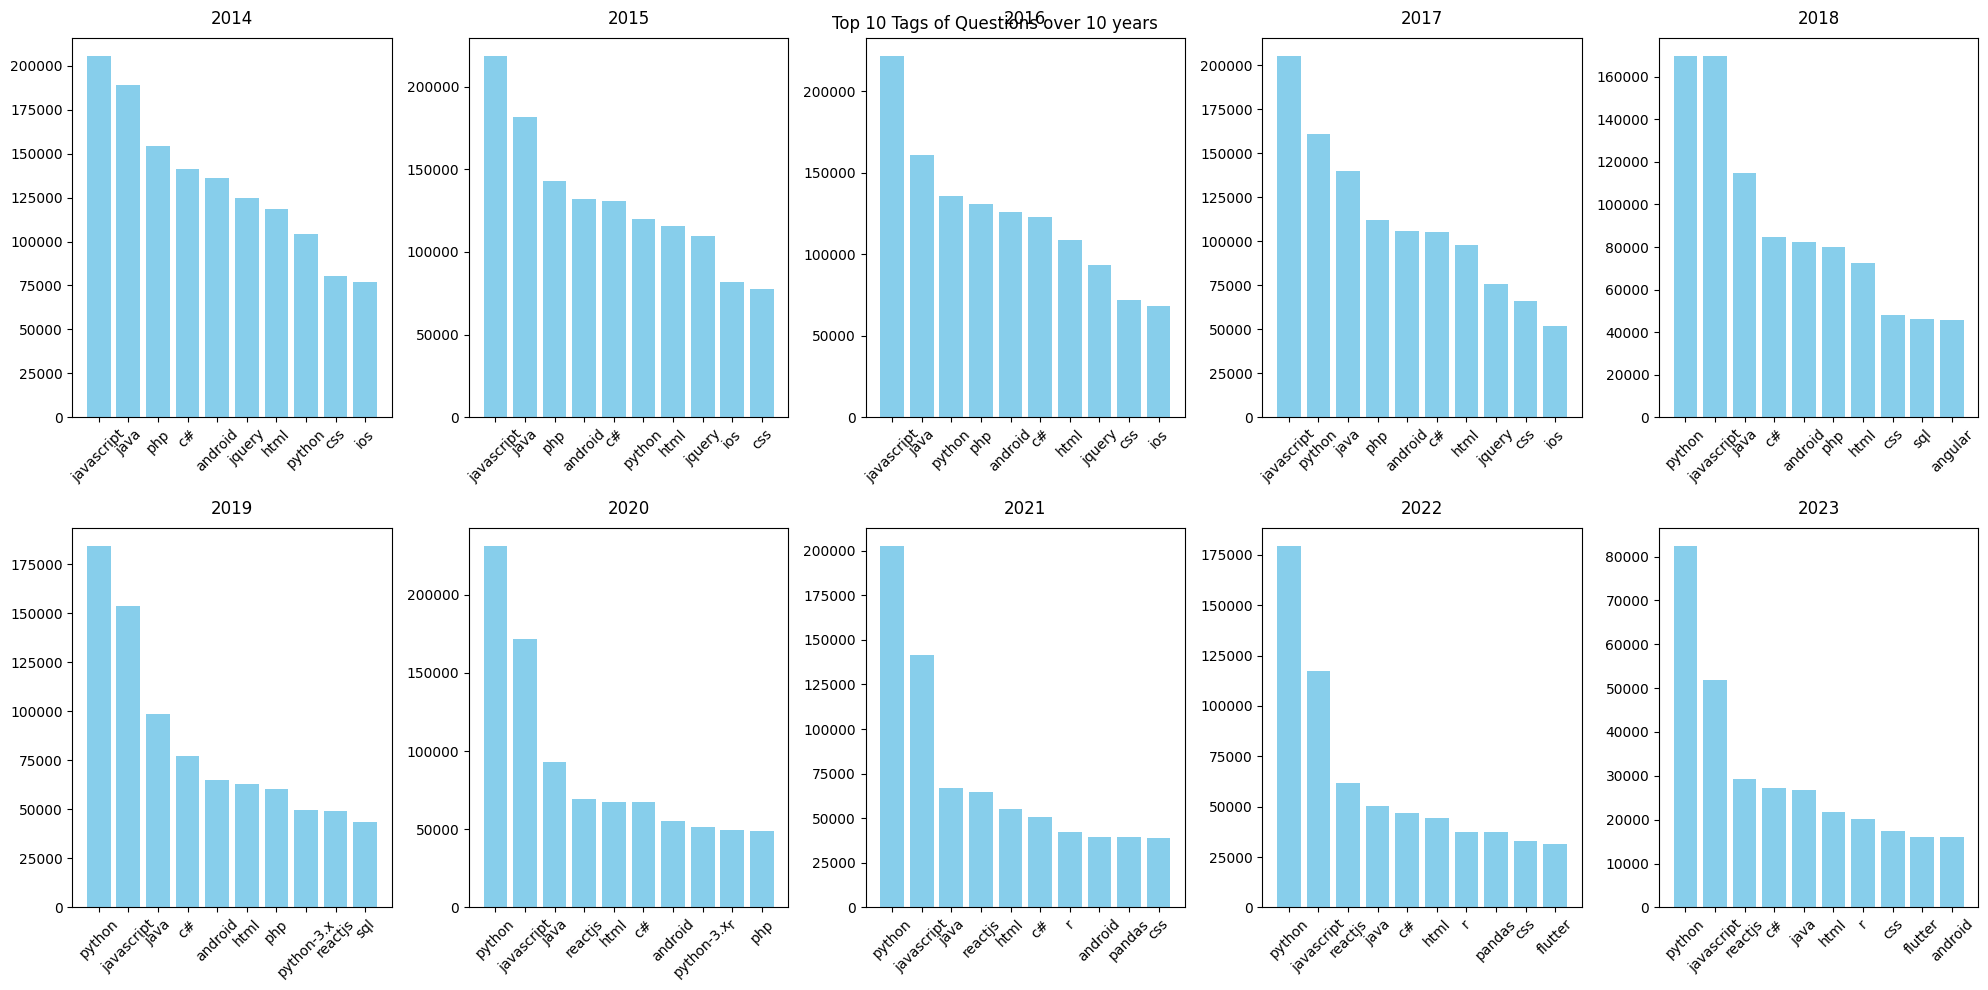

In [107]:
### create a figure with multiple subplots


sharey = False ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 5, figsize = (20, 10), sharey=sharey, sharex=sharex)

for x in range(0, 2):
    for y in range(0,5):
        standard_year = 2014
        loop_year = standard_year + (x*5 + y*1)
        axs[x][y].bar( df_da_q_year[df_da_q_year['year'] ==loop_year].q_tags_list
                    ,  df_da_q_year[df_da_q_year['year'] ==loop_year].q_id
                    ,  color = 'skyblue'
                ) # hist type
        axs[x][y].set_title(str(loop_year), # add title
             pad = 10,
             loc = 'center')
        axs[x][y].tick_params(axis='x', rotation=45)


 
plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [41]:
df_da_q_per_len         = df_da_q.groupby(['date','year', 'month', 'day']).mean(['q_tagslen']).reset_index()
df_da_q_per_len_min     = df_da_q.groupby(['date','year', 'month', 'day']).min(['q_tagslen']).reset_index()
df_da_q_per_len_max     = df_da_q.groupby(['date','year', 'month', 'day']).max(['q_tagslen']).reset_index()
df_da_q_per_len_median  = df_da_q.groupby(['date','year', 'month', 'day']).median(['q_tagslen']).reset_index()


In [42]:
df_da_q_per_len

,date,year,month,day,q_id,q_tagslen
0,2013-11-01,2013,11,1,1.972806e+07,2.990741
1,2013-11-02,2013,11,2,1.974292e+07,2.947686
2,2013-11-03,2013,11,3,1.975407e+07,2.977130
3,2013-11-04,2013,11,4,1.976974e+07,2.978964
4,2013-11-05,2013,11,5,1.979053e+07,2.977150
...,...,...,...,...,...,...
3677,2023-11-26,2023,11,26,7.755191e+07,3.031455
3678,2023-11-27,2023,11,27,7.755734e+07,2.996209
3679,2023-11-28,2023,11,28,7.756431e+07,3.021692
3680,2023-11-29,2023,11,29,7.757156e+07,3.031519


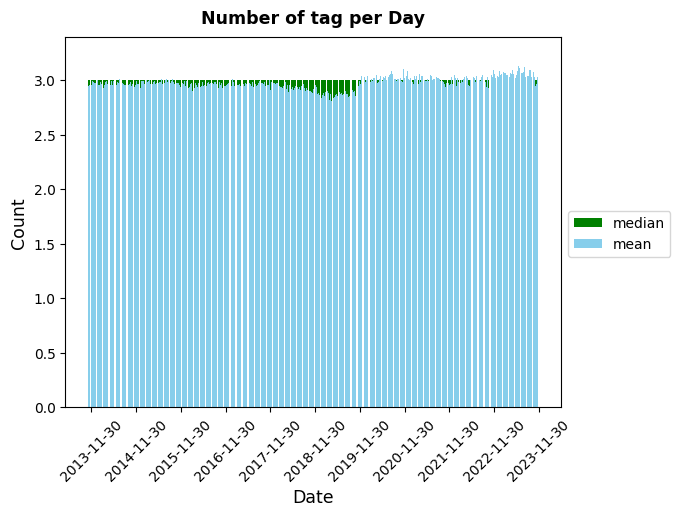

In [43]:
fig, ax = plt.subplots()

ax.bar(df_da_q_per_len_median.date
    ,  height = df_da_q_per_len_median['q_tagslen']
    ,  color = 'green'
    ,  label = 'median'
    # ,  edgecolor = 'black'
      ) # hist type


ax.bar(df_da_q_per_len.date
    ,  height = df_da_q_per_len['q_tagslen']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type



ax.set_title("Number of tag per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

# ax.axvline('2022-11-30', # add vertical line
#            color = 'red',
#            linestyle = '--',
#            linewidth = 1.5)

ax.legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_da_q_per_len_median

In [ ]:
df_user['year'] = df_user['creationdate'].dt.year
df_user['month'] = df_user['creationdate'].dt.month
df_user['day'] = df_user['creationdate'].dt.day
df_user['date'] = df_user['creationdate'].dt.date


In [ ]:
df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date         = df_user.groupby(['date','year', 'month', 'day']).count()[['id']].reset_index()

In [ ]:
df_user_per_date

In [ ]:
fig, ax = plt.subplots()

ax.bar(df_user_per_date.date
    ,  height = df_user_per_date['id']
    ,  color = 'skyblue'
    ,  label = 'mean'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Sign up Users per Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline(['2022-11-30'], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

# ax.legend( title_fontsize = 10, fontsize = 10,
#           bbox_to_anchor = (1, 0.55))

plt.xticks(rotation=45)
plt.show();

In [ ]:
df_user

In [ ]:
df_da_q = df_da[['q_id', 'q_owneruserid']].drop_duplicates()
df_da_a = df_da[['a_id', 'a_owneruserid']].drop_duplicates()

In [ ]:
df_da_q_cnt = df_da_q.groupby(['q_owneruserid']).count()[['q_id']]
df_da_a_cnt = df_da_a.groupby(['a_owneruserid']).count()[['a_id']]

In [ ]:
df_user_qna = pd.merge(df_user, df_da_q_cnt, left_on = 'id', right_on = 'q_owneruserid', how= 'left')
df_user_qna = pd.merge(df_user_qna, df_da_a_cnt, left_on = 'id', right_on = 'a_owneruserid', how= 'left')

In [ ]:
df_user_qna.fillna(0, inplace=True)

In [ ]:
df_user_qna

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_user_qna['q_id'], df_user_qna['a_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_user_qna['gpt_af_yn'] = np.where(df_user_qna['date'] >= datetime.date(2022,11,30), 1, 0)

In [ ]:
df_user_qna

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna, x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data = df_user_qna[df_user_qna['gpt_af_yn'] ==1] , x = 'q_id', y = 'a_id', hue = 'gpt_af_yn' )

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_user_qna[df_user_qna['a_id']>70000]

아니 혼자 7만건은 좀 너무한거 아닙니까...ㅎㅎㅎㅎㅎ

In [ ]:
df_q_1144035 = df_da.loc[df_da['a_owneruserid'] == 1144035, ['q_id', 'a_creationdate']]

In [ ]:
df_q_1144035 = df_q_1144035[['q_id', 'a_creationdate']].drop_duplicates()

In [ ]:
df_q_1144035['date'] = df_q_1144035['a_creationdate'].dt.date

In [ ]:
df_q_1144035

In [ ]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(df_q_1144035['date'], df_q_1144035['q_id'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [ ]:
df_q_1144035['date'].max()

In [ ]:
df_q_1144035.groupby('date').count()[['q_id']].sort_values(by = ['date'])